1. Задание
Задача:
Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.
Решение:

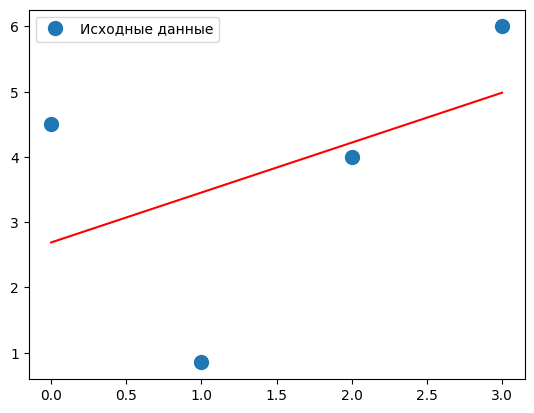

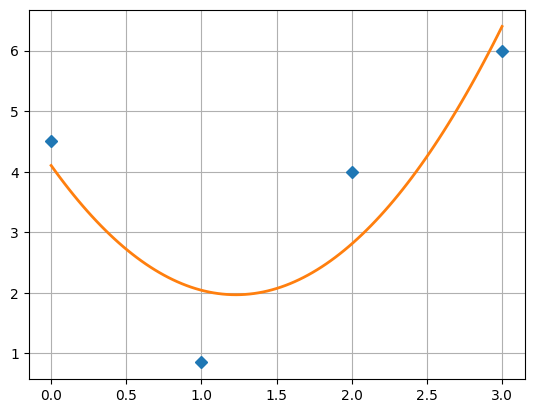

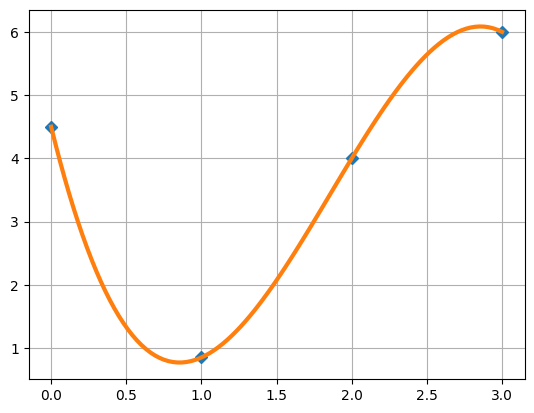

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3])
y = np.array([4.5, 0.85, 4, 6])

A = np.vstack([x, np.ones(len(x))]).T

m, c = np.linalg.lstsq(A, y, rcond=None)[0]

plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m * x + c, 'r')
plt.legend()
plt.show()

m = np.vstack((x ** 2, x, np.ones(len(x)))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
x_prec = np.linspace(0, 3, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.show()


m = np.vstack((x ** 3, x ** 2, x, np.ones(len(x)))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
x_prec = np.linspace(0, 3, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.show()


2. Задание
Задача:
Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных
Решение

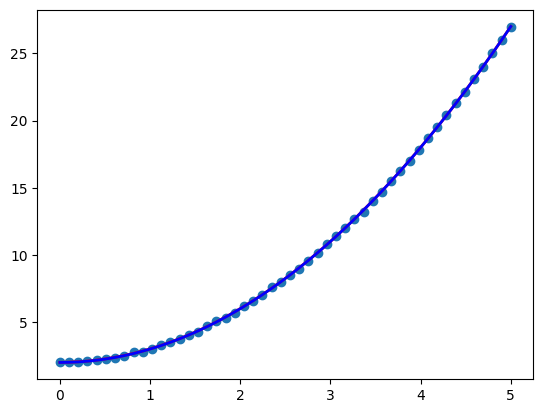

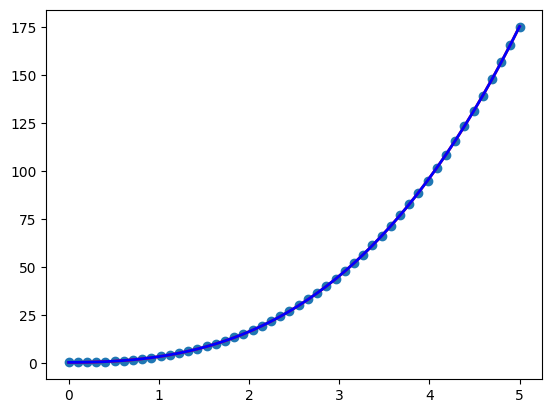

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

beta = (1, 2)


def f1(x, b0, b1):
    return x ** 2 * b0 + b1


x_data = np.linspace(0, 5, 50)
y = f1(x_data, *beta)
y_data = y + 0.05 * np.random.randn(len(x_data))
beta_opt, beta_cov = curve_fit(f1, x_data, y_data)

fig, ax = plt.subplots()
ax.scatter(x_data, y_data)
ax.plot(x_data, y, 'r', lw=2)
ax.plot(x_data, f1(x_data, *beta_opt), 'b', lw=2)
plt.show()

beta = (1, 2, 0.5)


def f2(x, b0, b1, b2):
    return x ** 3 * b0 + b1 * x ** 2 + b2


x_data = np.linspace(0, 5, 50)
y = f2(x_data, *beta)
y_data = y + 0.05 * np.random.randn(len(x_data))
beta_opt, beta_cov = curve_fit(f2, x_data, y_data)

fig, ax = plt.subplots()
ax.scatter(x_data, y_data)
ax.plot(x_data, y, 'r', lw=2)
ax.plot(x_data, f2(x_data, *beta_opt), 'b', lw=2)
plt.show()

3. Задание
Задача:
Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Найдите коэффициенты линии регрессии. Постройте прогноз
Решение

     Actual      Predicted
0   37731.0   40748.961841
1  122391.0  122699.622956
2   57081.0   64961.657170
3   63218.0   63099.142145
4  116969.0  115249.562855
5  109431.0  107799.502753


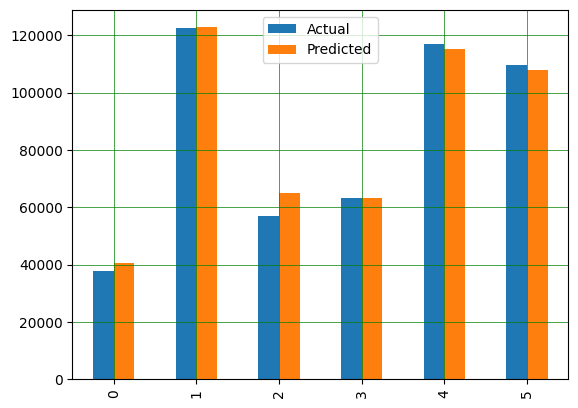

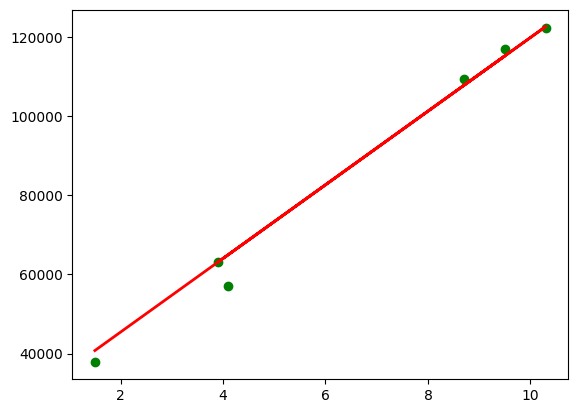

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'

dataframe = pd.read_csv(url)

x = dataframe.iloc[:, :-1].values
y = dataframe.iloc[:, 1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(x_test, y_test, color='green')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

4. Задание
Задача:
Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов.Найдите коэффициенты
множественной регрессии. Постройте прогноз
Решение

In [4]:
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'

dataframe = pd.read_csv(url)
print(dataframe)

x = dataframe[['fixed acidity', 'volatile acidity', 'citric acid',
               'residual sugar', 'chlorides', 'free sulfur dioxide',
               'total sulfur dioxide', 'density', 'pH',
               'sulphates', 'alcohol']]
y = dataframe['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  